Info sul dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Descrizione
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000  

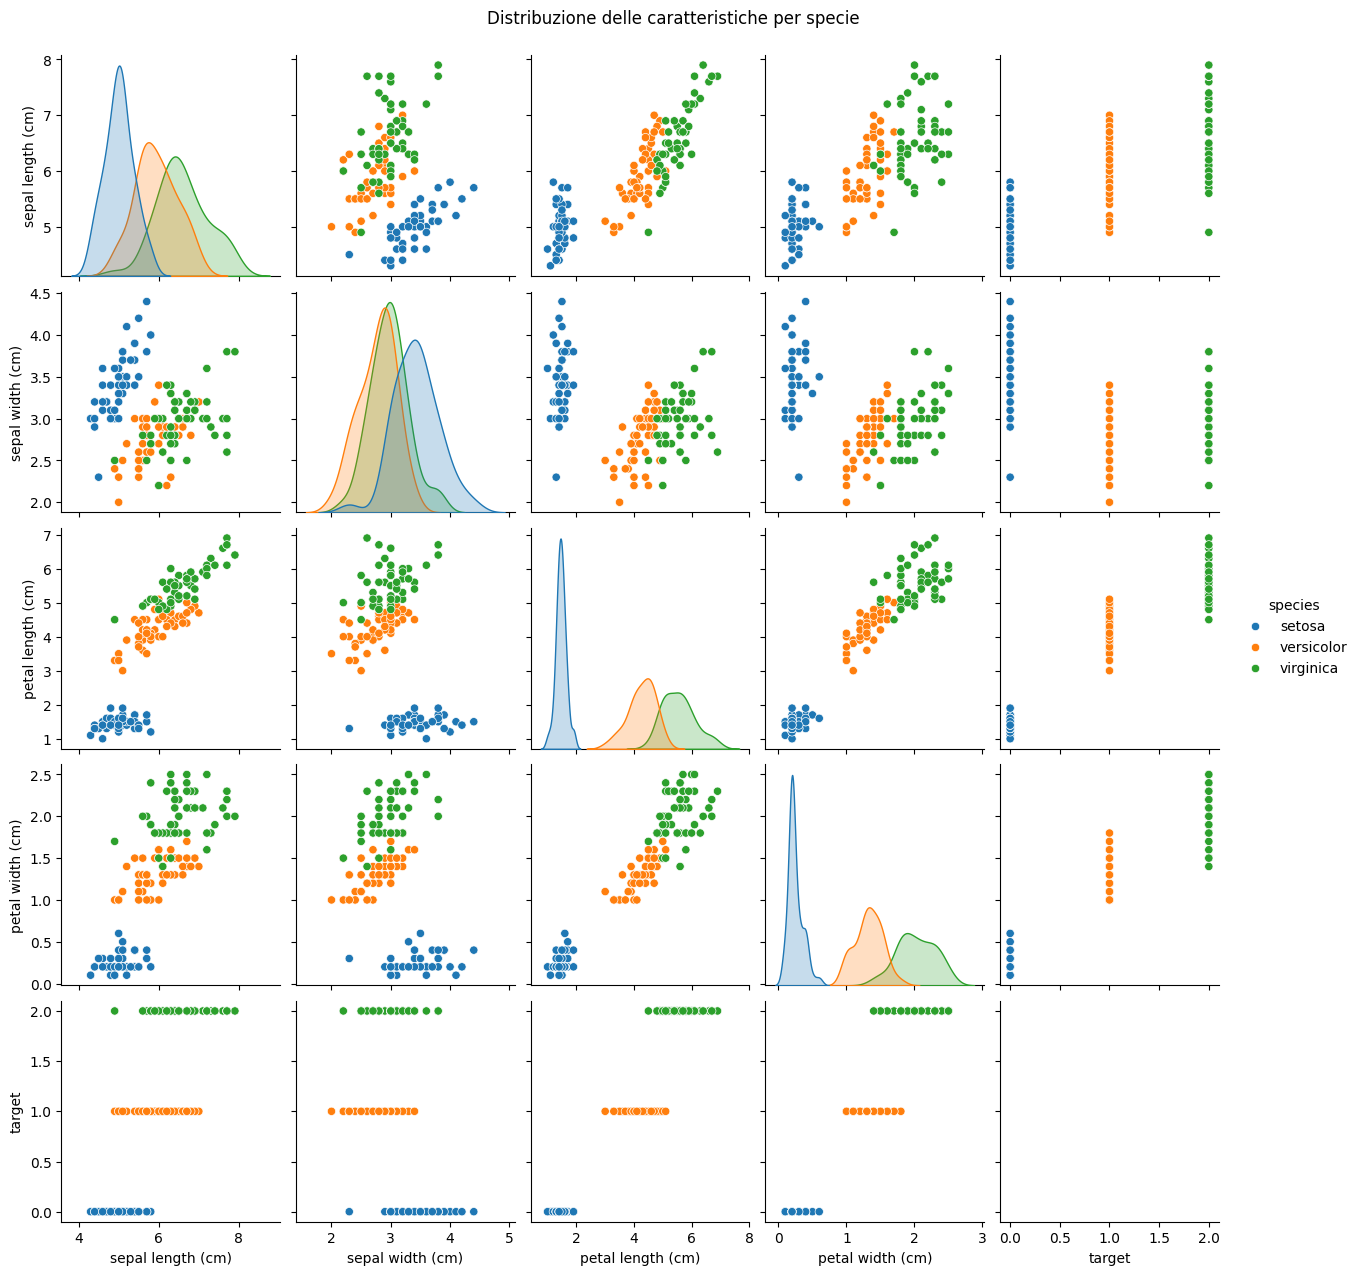

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = load_iris() #caricamento dataset 


#Creazione di un dataframe con le caratteristiche
df = pd.DataFrame(data.data, columns=data.feature_names) 
df["target"] = data.target
df["species"] = df["target"].apply(lambda x : data.target_names[x])

print("Info sul dataset")
print(df.info())

print("Descrizione")
print(df.describe())

print("Prime 5 righe datset")
print(df.head())

# Pairplot per visualizzare le relazioni tra le variabili
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Distribuzione delle caratteristiche per specie", y=1.02)
plt.show()



In [6]:
X = df[data.feature_names]
y = df["target"]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # classificazione binaria
    eval_metric='logloss',        # metrica interna
    random_state=42,
    n_jobs=-1
)

# Addestramento
xgb_model.fit(X_train, y_train)

# Predizioni
pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

# Stampa risultato
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.33%
